# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Suryadi
- **Email:** sur77523@gmail.com
- **ID Dicoding:** surya31

## Menentukan Pertanyaan Bisnis

- Adakah hubungan antara keadaan cuaca dengan jumlah pengguna sepeda?
- Pada situasi workingday (hari kerja), holiday (hari libur) , dan weekday (akhir pekan) apa yang dapat di amati?
- Menurut kategori pelanggan Casual maupun Registered apakah penggunaan sepeda dipengaruhi oleh musim?
- Total dari pengguna sepeda oleh pelanggan Casual maupun Registered apakah dipengaruhi oleh variabel temp, atemp, dan humidity?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
bike_day_df = pd.read_csv("https://raw.githubusercontent.com/Suryaaa31/Dicoding-Proyek-Analisis-Data/master/Bike-sharing-dataset/day.csv")
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bike_hour_df = pd.read_csv("https://raw.githubusercontent.com/Suryaaa31/Dicoding-Proyek-Analisis-Data/master/Bike-sharing-dataset/hour.csv")
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data bike_day_df

In [5]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat kesalahan tipe data pada dteday dimana seharusnya datetime

In [6]:
print("Jumlah duplikasi: ", bike_day_df.duplicated().sum())
bike_day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data bike_hour_df

In [7]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat kesalahan tipe data pada dteday dimana seharusnya datetime, karena object digunakan untuk data yang bertipe string

In [8]:
print("Jumlah duplikasi: ", bike_hour_df.duplicated().sum())
bike_hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terdapat duplikasi serta tidak ada missing value (tidak ada nilai hilang atau kosong)

### Cleaning Data

####Membersihkan Data bike_day_df

In [9]:
datetime_coloumns = ['dteday']

for column in datetime_coloumns:
  bike_day_df[column] = pd.to_datetime(bike_day_df[column])

bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Tipe data berhasil diperbaiki dari object ke datetime

Mengubah beberapa keterangan untuk memudahkan dalam pengambilan kesimpulan

In [10]:
#Mengubah bulan dari angka menjadi nama bulan
bike_day_df['mnth'] = bike_day_df['mnth'].map({
    1: 'Januari', 2: 'Februari', 3: 'Maret',
    4: 'April', 5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus',
    9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
})

#Mengubah musim/season dengan nama musim
bike_day_df['season'] = bike_day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Autumn', 4: 'Winter'
})

#Mengubah kondisi awan dengan nama yang mudah
bike_day_df['weathersit'] = bike_day_df['weathersit'].map({
    1: 'Sunny', 2: 'Cloudly', 3: 'Rain', 4: 'Snow'
})

####Membersihkan Data bike_hour_df

Pada tahap membersihkan data bike_hour_df adalah menghapus tabel tersebut, karena pada pertanyaan bisis yang telah dibuat tidak ada korelasi dengan data pada tabel bike_hour_df. Sebenarnya bike_day_df dan bike_hour_df memiliki isi yang sama hanya beda pada kolom hr saja.

## Exploratory Data Analysis (EDA)

### Explore bike_day_df

- Mengelompokkan pegguna sepeda berdasarkan bulan

In [11]:
bike_day_df.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
            max   min         mean     sum
mnth                                      
Agustus    7865  1115  5664.419355  351194
April      7460   795  4484.900000  269094
Desember   6606   441  3403.806452  211036
Februari   5062  1005  2655.298246  151352
Januari    4521   431  2176.338710  134933
Juli       8173  3285  5563.677419  344948
Juni       8120  3767  5772.366667  346342
Maret      8362   605  3692.258065  228920
Mei        8294  2633  5349.774194  331686
November   6852  1495  4247.183333  254831
Oktober    8156    22  5199.225806  322352
September  8714  1842  5766.516667  345991

(∴) Berdasarkan hasil dari parameter statistik diatas didapat informasi bahwa rata-rata pengguna paling tinggi pada bulan 6 (Juni) dan rata-rata pengguna paling rendah pada bulan 1 (Januari)

- Mengelompokkan pengguna sepeda berdasarkan keadan cuaca

In [12]:
bike_day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
             max  min         mean      sum
weathersit                                 
Cloudly     8362  605  4035.862348   996858
Rain        4639   22  1803.285714    37869
Sunny       8714  431  4876.786177  2257952

(∴) Berdasarkan parameter tersebut pengguna sepeda lebih banyak pada kondisi mendung/berawan/cloudly dan sedikit saat hujan serta tidak ada saat turun salju/snow.

- Mengelompokkan pengguna sepeda berdasarkan hari libur

In [13]:
bike_day_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

(∴) Ternyata pengguna sepeda lebih banyak pada saat bukan hari libur melainkan hari-hari biasa

- Melakukan perbandingan pengguna sepeda pada weekday dan weekend

In [14]:
bike_day_df.groupby(by='weekday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
          max   min         mean     sum
weekday                                 
0        8227   605  4228.828571  444027
1        7525    22  4338.123810  455503
2        7767   683  4510.663462  469109
3        8173   441  4548.538462  473048
4        7804   431  4667.259615  485395
5        8362  1167  4690.288462  487790
6        8714   627  4550.542857  477807

(∴) Berdasarkan hasil tersebut rata-rata pengguna sepeda memiliki urutan dari terbesar ke terkecil sebagai berikut: 5 (Friday), 4(Thursday), 6(Saturday), 3(Wednesday), 2(Tuesday), 1(Monday), dan 0(Sunday).

- Mengelompokkan pengguna sepeda berdasarkan hari kerja/working day

In [15]:
bike_day_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

(∴) Ternyata jumlah pengguna saat working day lebih besar dibanding bukan working day

- Mengelompokkan pengguna sepeda berdasarkan musim/season

In [16]:
bike_day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean', 'sum'],
    'atemp': ['max', 'min', 'mean', 'sum'],
    'hum': ['max', 'min', 'mean', 'sum']
})

temp                                     atemp            \
             max       min      mean         sum       max       min   
season                                                                 
Autumn  0.861667  0.469167  0.706309  132.786150  0.840896  0.242400   
Spring  0.572500  0.059130  0.297748   53.892306  0.548617  0.079070   
Summer  0.808333  0.253043  0.544405  100.170549  0.757579  0.250339   
Winter  0.657500  0.220833  0.422906   75.277275  0.607975  0.227913   

                                   hum                                  
            mean         sum       max       min      mean         sum  
season                                                                  
Autumn  0.655898  123.308898  0.939565  0.360000  0.633482  119.094627  
Spring  0.296914   53.741424  0.948261  0.000000  0.582903  105.505427  
Summer  0.520307   95.736548  0.922500  0.254167  0.626948  115.358493  
Winter  0.415539   73.965896  0.972500  0.333478  0.668719  119.032013

(∴) Rata-rata temperatur (temp) dan atemp paling tinggi terjadi saat autumn, kemudian summer, winter, dan spring. Sedangkan humidity tertinggi saat winter season kemudian autumn, summer, dan spring

- Melakukan cek korelasi antara casual, registered dan count

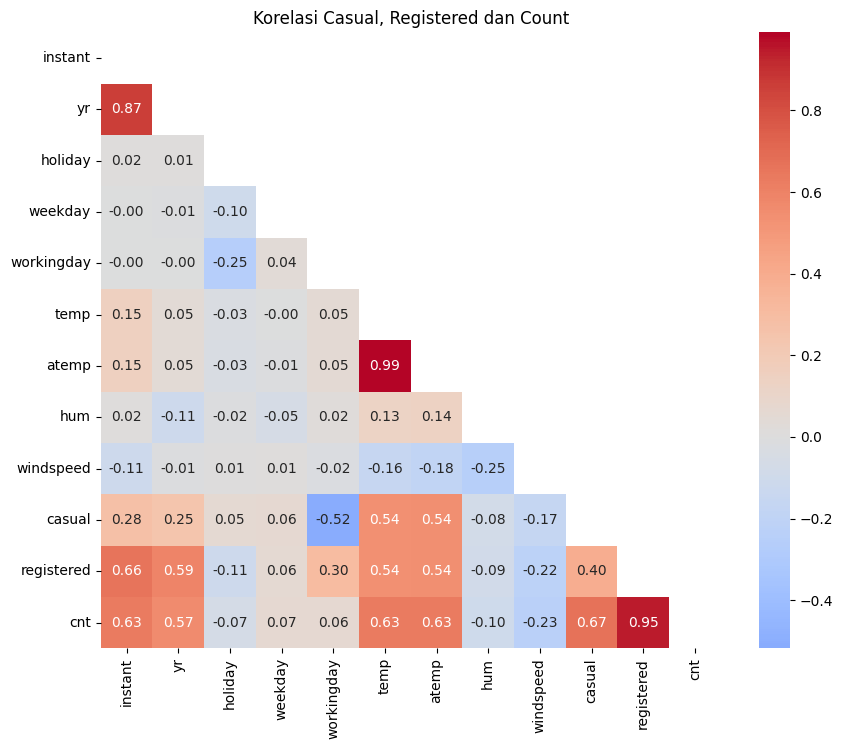

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
correlation_matrix = bike_day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Korelasi Casual, Registered dan Count")
plt.show()

(∴) Berdasarkan hasil dari plot tersebut:
- temp dan atemp memiliki hubungan (0.99)
- hum memiliki korelasi yang cukup lemah dengan temp (0.13) dan atemp (0.14)
- casual memiliki korelasi dengan temp dan atemp sebesar (0.54) namun negatif dengan hum(-0.08)
- registered memiliki pola seperti casual, dan berkorelasi dengan casual (0.40).
- count berkorelasi kuat dengan temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.95), dan sedikit negatif dengan hum (-0.10).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Adakah hubungan antara keadaan cuaca dengan jumlah pengguna sepeda?

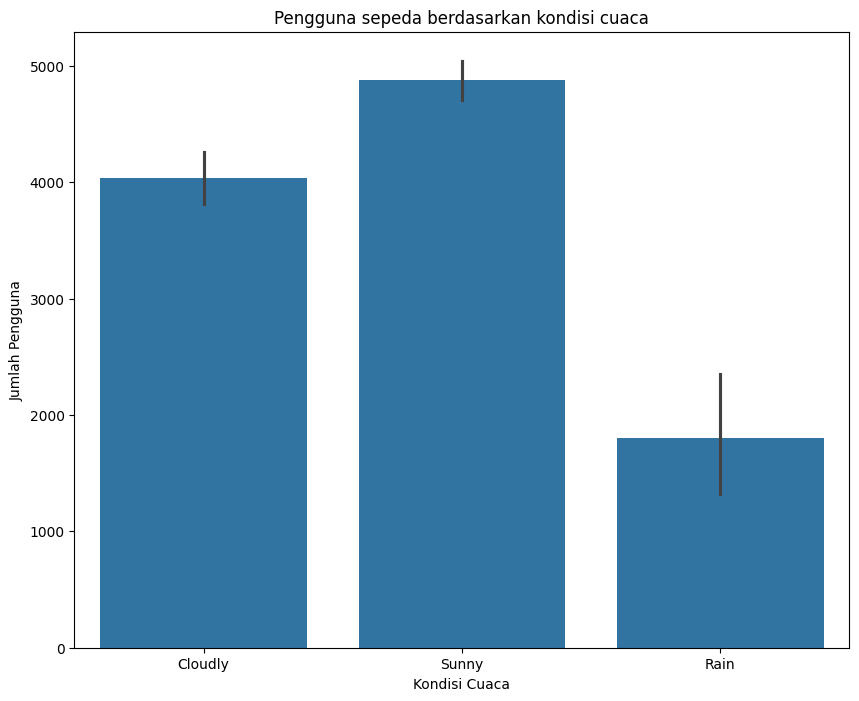

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(x='weathersit', y='cnt', data=bike_day_df)
plt.title('Pengguna sepeda berdasarkan kondisi cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna')
plt.show()

### Pertanyaan 2: Pada situasi workingday (hari kerja), holiday (hari libur) , dan weekday apa yang dapat di amati?

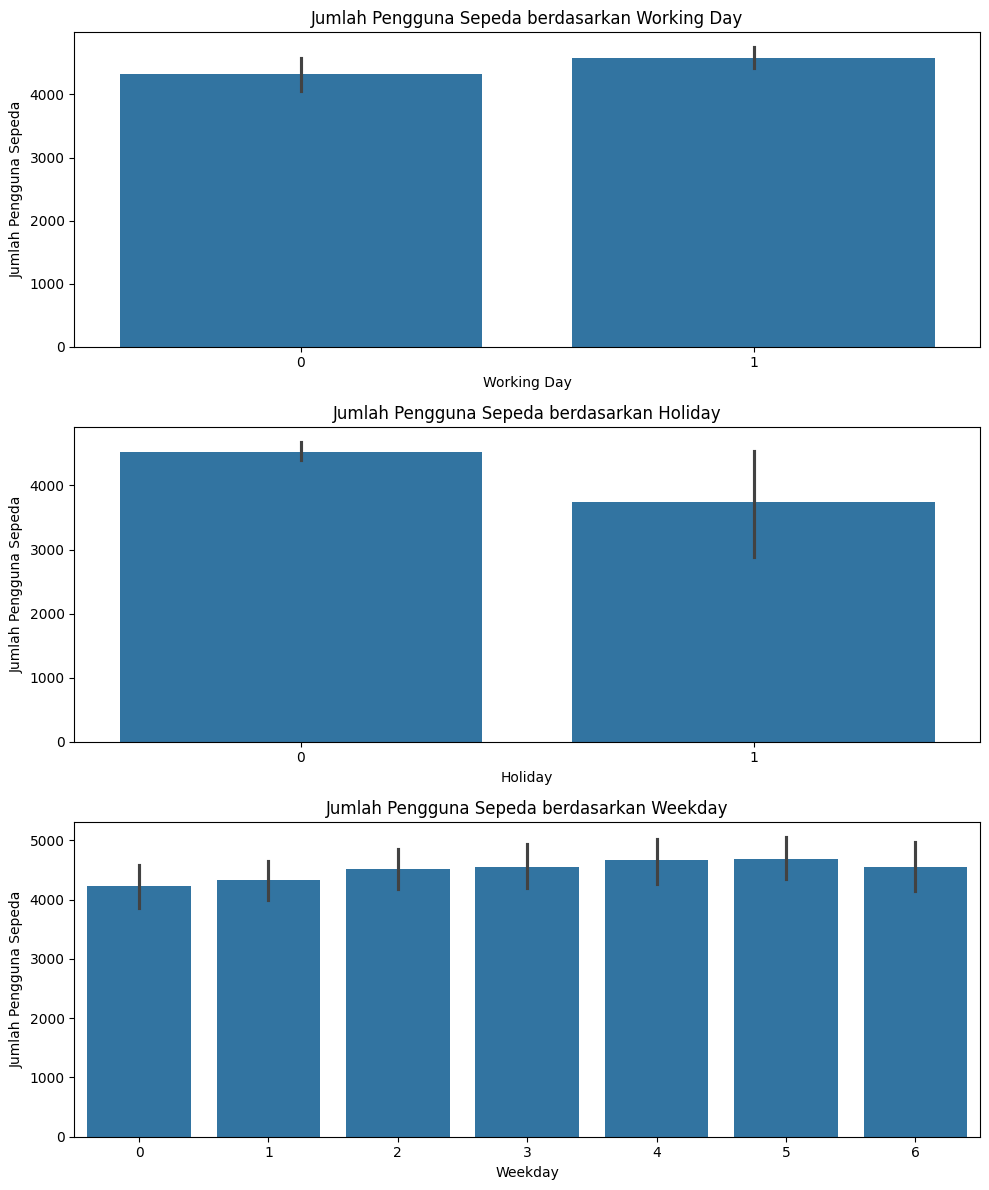

In [19]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

#Menurut hari kerja(workingday)
sns.barplot(x='workingday', y='cnt', data=bike_day_df, ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Working Day')
axes[0].set_xlabel('Working Day')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

#Menurut hari libur(holiday)
sns.barplot(x='holiday', y='cnt', data=bike_day_df, ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Holiday')
axes[1].set_xlabel('Holiday')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

#Menurut Weekday
sns.barplot(x='weekday', y='cnt', data=bike_day_df, ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Weekday')
axes[2].set_xlabel('Weekday')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

### Pertanyaan 3: Total dari pengguna sepeda oleh pelanggan Casual maupun Registered apakah dipengaruhi oleh variabel temp, atemp, dan humidity?

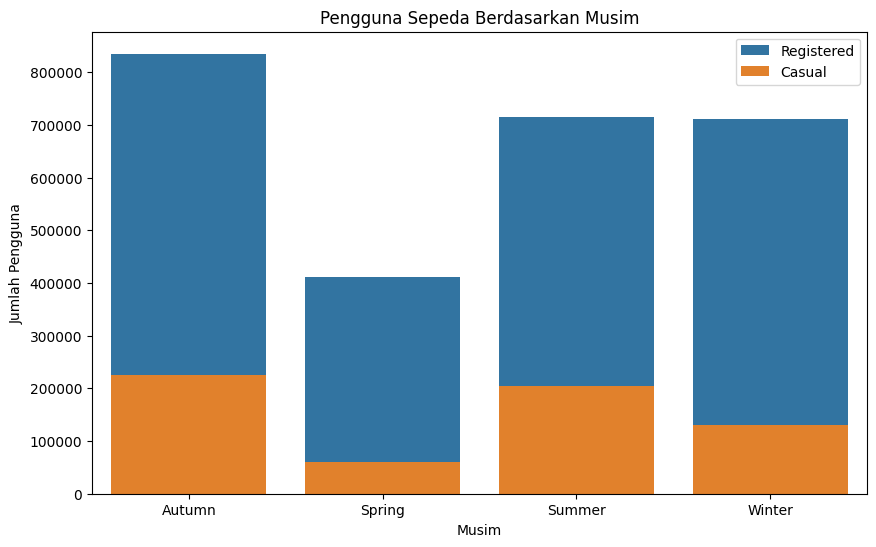

In [20]:
seasonal_usage = bike_day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='registered', data=seasonal_usage, label='Registered')
sns.barplot(x='season', y='casual', data=seasonal_usage, label='Casual')
plt.title('Pengguna Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna')
plt.legend()
plt.show()

### Pertanyaan 4: Menurut kategori pelanggan Casual maupun Registered apakah penggunaan sepeda dipengaruhi oleh musim?

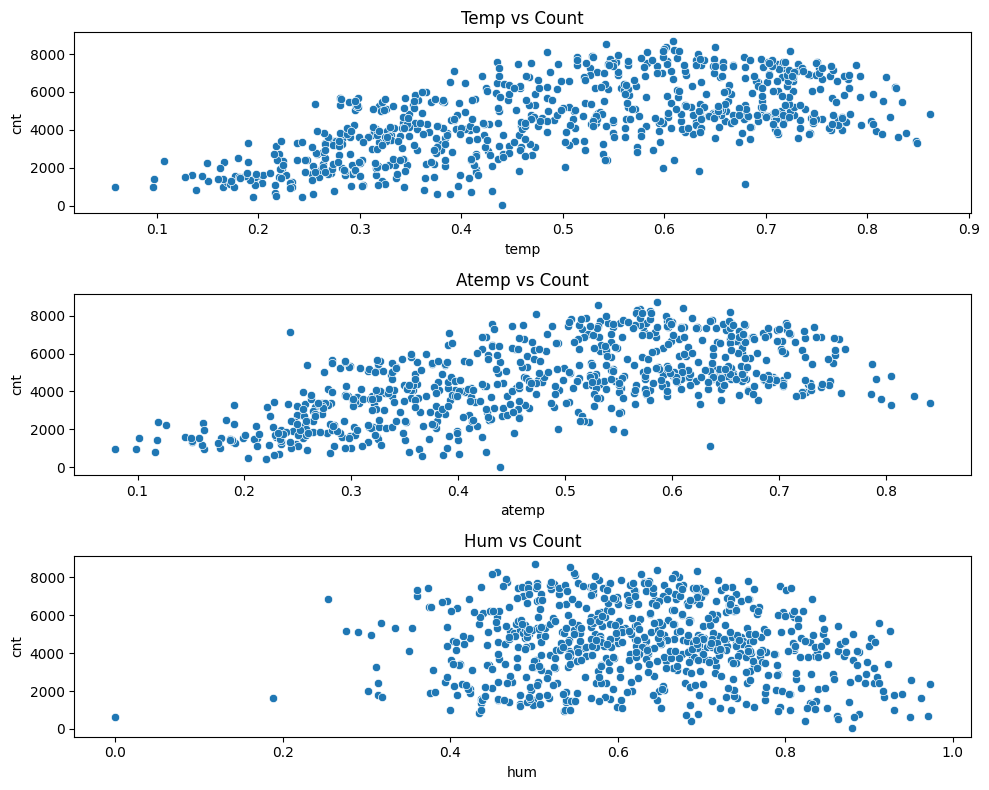

In [25]:
plt.figure(figsize=(10,8))

#Scatter plot temp dan count
plt.subplot(3, 1, 1)
sns.scatterplot(x='temp', y='cnt', data=bike_day_df)
plt.title('Temp vs Count')

#Scatter plot atemp dan count
plt.subplot(3, 1, 2)
sns.scatterplot(x='atemp', y='cnt', data=bike_day_df)
plt.title('Atemp vs Count')

#Scatter plot hum dan count
plt.subplot(3, 1, 3)
sns.scatterplot(x='hum', y='cnt', data=bike_day_df)
plt.title('Hum vs Count')

plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1: Berdasarkan parameter statistik terlihat bahwa jumlah pengguna/penyewa sepeda paling tinggi pada saat cloudy (mendung/berawan). Jumlah pengguna sepeda saat hujan mengalami penurunan yang cukup signifikan serta saat salju tidak ada pengguna sepeda sama sekali. Sehingga dapat disimpulkan bahwa ada hubungan yang jelas antara keadaan / kondisi cuaca dengan jumlah pengguna sepeda.
- Conclution pertanyaan 2: Jumlah pengguna sepeda cenderung tinggi pada working day dibandingkan dengan holiday. Terdapat pola penggunaan sepeda yang berbeda setiap hari dalam sepekan (weekday) dengan puncak penggunaan tertinggi pada Jumat dan Sabtu.
-Conclution pertanyaan 3: Visualisasi menunjukkan bahwa baik pengguna Casual maupun Registered cenderung lebih banyak menggunakan sepeda pada musim gugur (Autumn) dan musim panas (Summer), ketika suhu (temp dan atemp) lebih tinggi. Namun, jumlah pengguna sepeda cenderung menurun seiring dengan peningkatan kelembapan (humidity).
-Conclution pertanyaan 4: Terdapat korelasi positif antara suhu (temp dan atemp) dengan jumlah pengguna sepeda, baik untuk pengguna Casual maupun Registered. Artinya, semakin tinggi suhu, semakin banyak orang yang menggunakan sepeda. Terdapat korelasi negatif yang lemah antara kelembapan (humidity) dengan jumlah pengguna sepeda. Artinya, semakin tinggi kelembapan, semakin sedikit orang yang menggunakan sepeda.